In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [6]:
base = pd.read_csv("insurance.csv")
base = base.drop(columns=['Unnamed: 0'])
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,False,Adult,Middle,Adventurous,Older,None,Football,None,FamilySedan,Normal,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,One
16276,False,Senior,Prole,Cautious,Older,None,EggShell,None,Economy,Normal,...,City,True,TenThou,Thousand,False,Thousand,Poor,False,Thousand,Zero
16277,False,Senior,Middle,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,Suburb,False,HundredThou,HundredThou,True,HundredThou,Poor,False,Thousand,Many
16278,False,Adult,Prole,Cautious,Older,None,EggShell,None,Economy,Excellent,...,Rural,False,Thousand,Thousand,False,Thousand,Fair,False,Thousand,Zero


In [7]:
# y - Variável dependente
y = base.iloc[:, 7].values

# X - Variáveis independentes
X = base.iloc[:, base.columns != 'Accident'].values

label_encoder = LabelEncoder()

In [9]:
for i in range(X.shape[1]):
  if X[:, i].dtype == 'object':
    X[:, i] = label_encoder.fit_transform(X[:, i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
# accuracy = 0.9434889434889435
# precision = [0.86647727 0.73655914 0.9802942  0.89228007]
# precision_weighted = 0.942340410287042
# recall = 0.9434889434889435
# f1 = 0.9423646654420773
# model = RandomForestClassifier(random_state=1, n_estimators=500)

# accuracy = 0.9328419328419328
# precision = [0.86363636 0.73371105 0.96384887 0.89045936]
# precision_weighted = 0.9297312879405792
# recall = 0.9328419328419328
# f1 = 0.928830397116877
model = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=20, max_leaf_nodes=8)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

In [21]:
predictions = model.predict(X_test)
predictions

accuracy = accuracy_score(y_test, predictions)

# Average define como é feito o cálculo da métrica do modelo, por exemplo:
# None - Calcula a métrica de cada classe (precisão de cada uma das 4 classes no exemplo)
# Weighted - Calcula a métrica de todas as classes juntas utilizando o peso dela em relação as demais
precision = precision_score(y_test, predictions, average=None)
precision_weighted = precision_score(y_test, predictions, average='weighted')

recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
print(f'accuracy = {accuracy} \nprecision = {precision} \nprecision_weighted = {precision_weighted} \nrecall = {recall} \nf1 = {f1}\n')

report = classification_report(y_test, predictions)
print(report)

accuracy = 0.9328419328419328 
precision = [0.86363636 0.73371105 0.96384887 0.89045936] 
precision_weighted = 0.9297312879405792 
recall = 0.9328419328419328 
f1 = 0.928830397116877

              precision    recall  f1-score   support

        Mild       0.86      0.59      0.70       418
    Moderate       0.73      0.71      0.72       366
        None       0.96      1.00      0.98      3548
      Severe       0.89      0.91      0.90       552

    accuracy                           0.93      4884
   macro avg       0.86      0.80      0.83      4884
weighted avg       0.93      0.93      0.93      4884



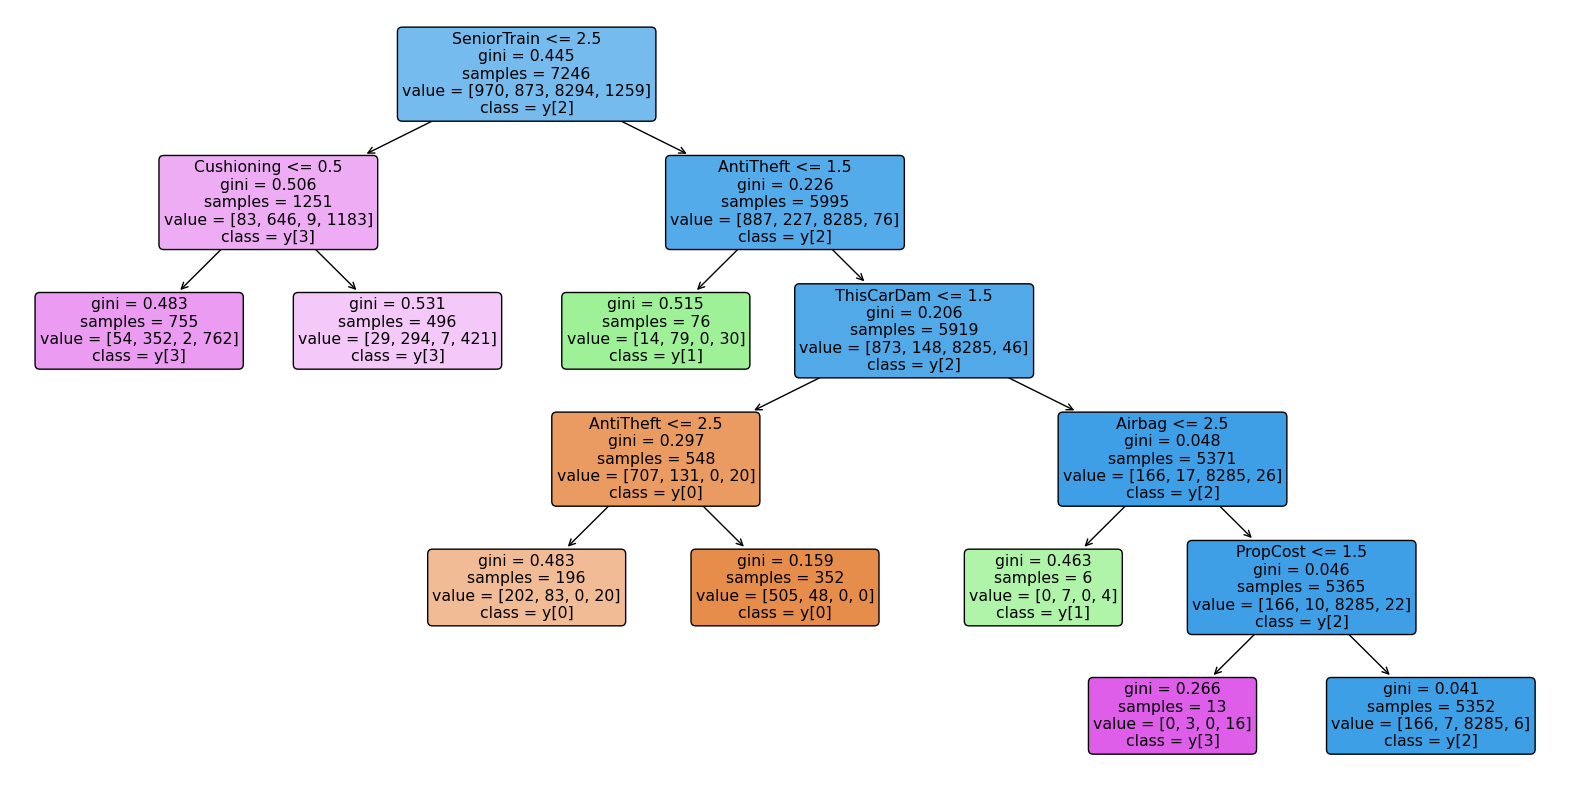

In [22]:
tree_index = 0
tree_to_visualize = model.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()